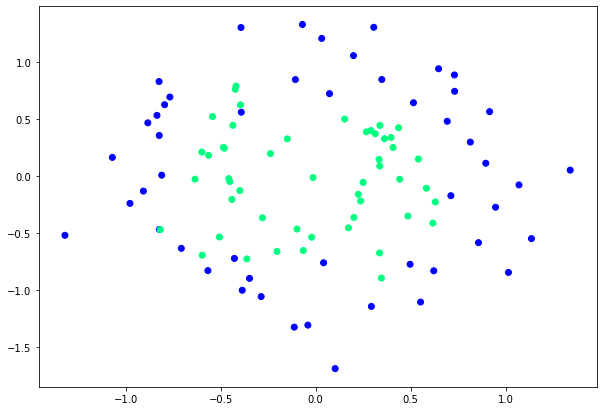

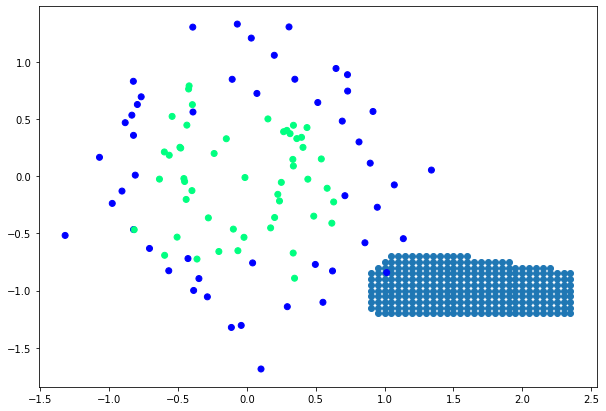

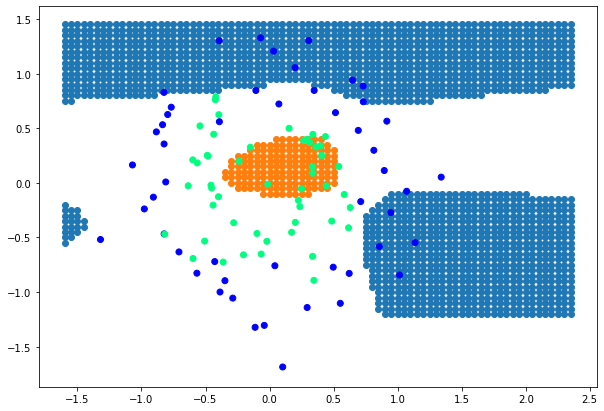

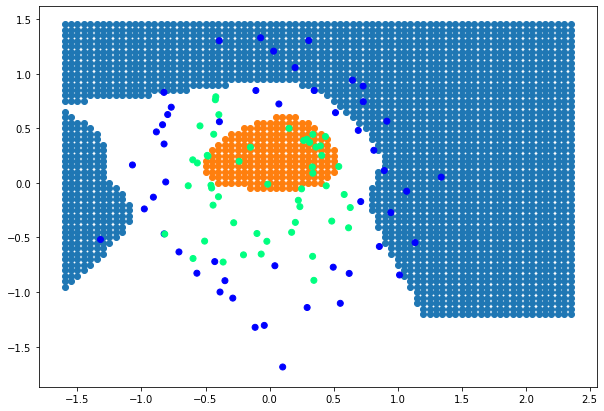

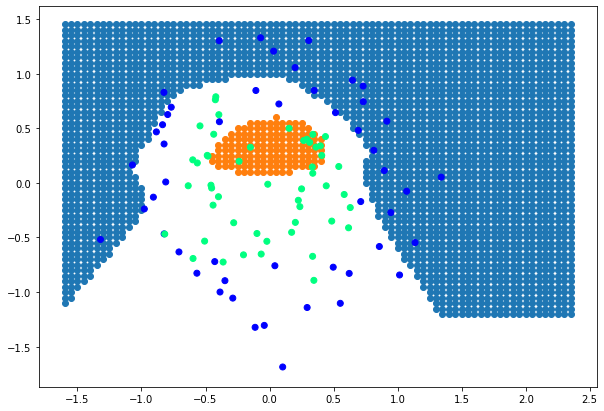

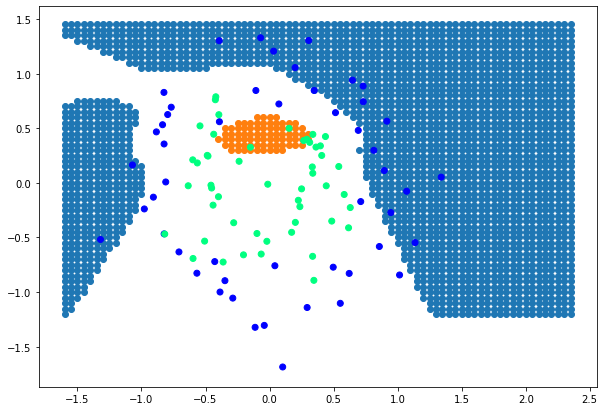

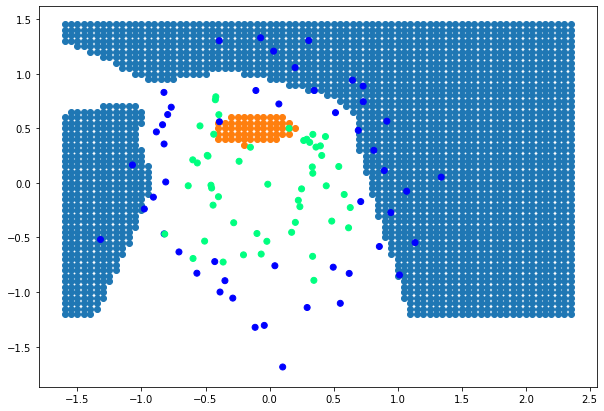

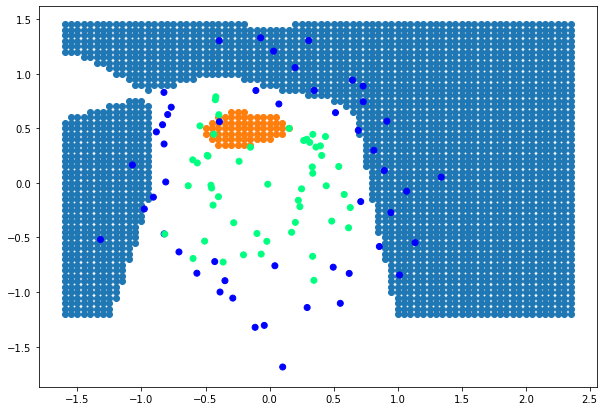

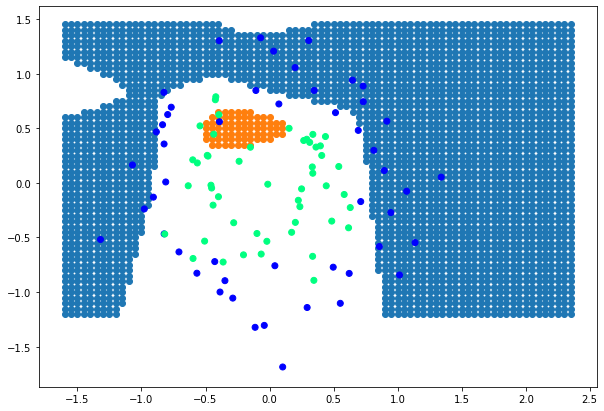

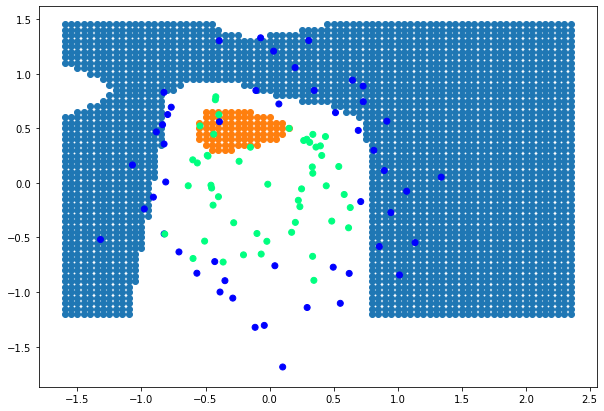

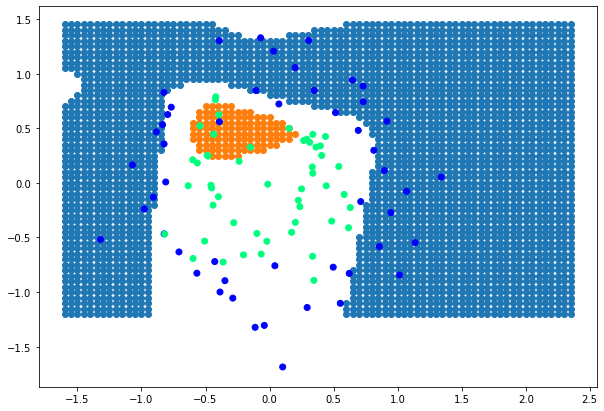

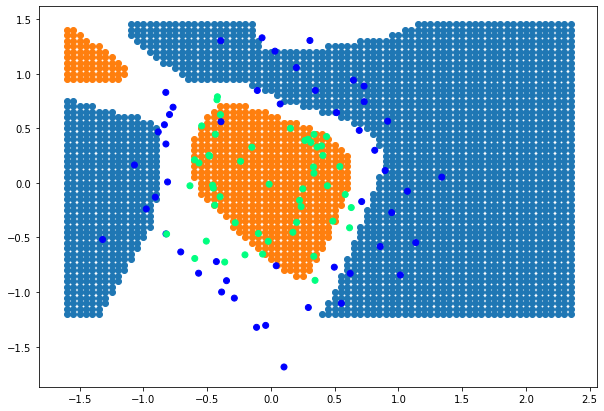

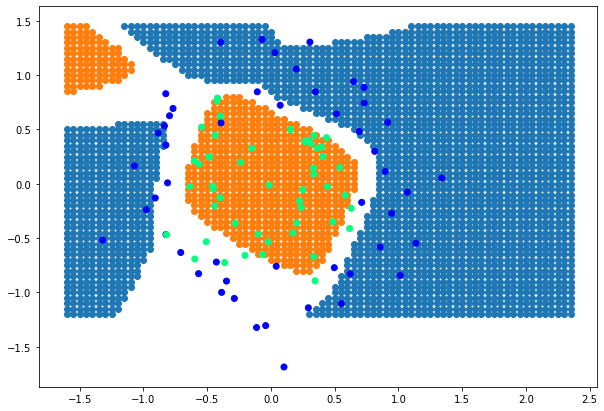

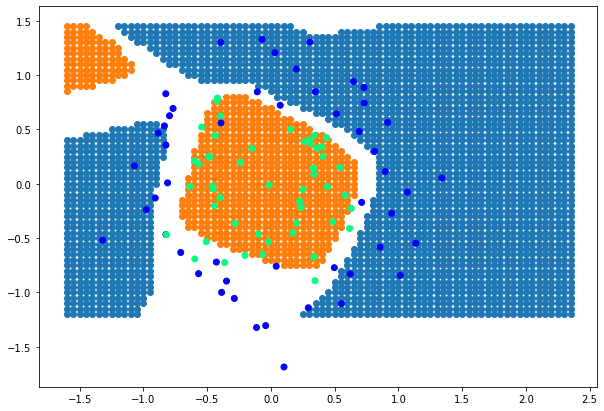

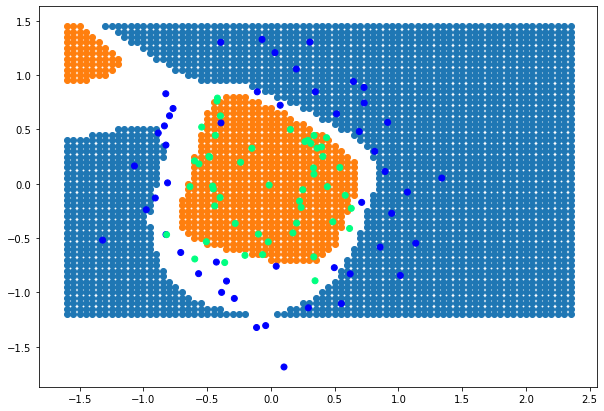

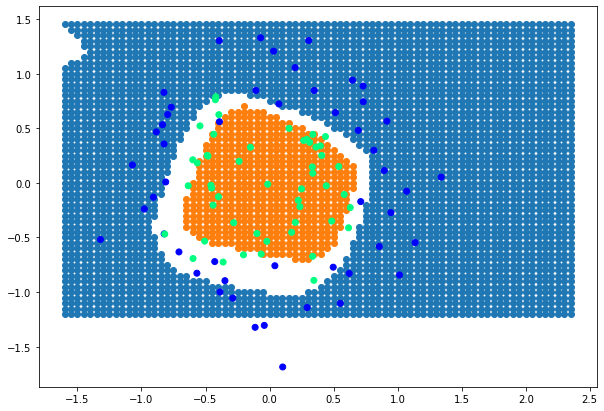

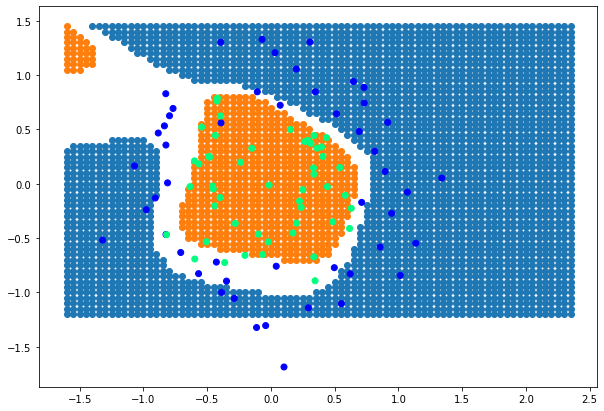

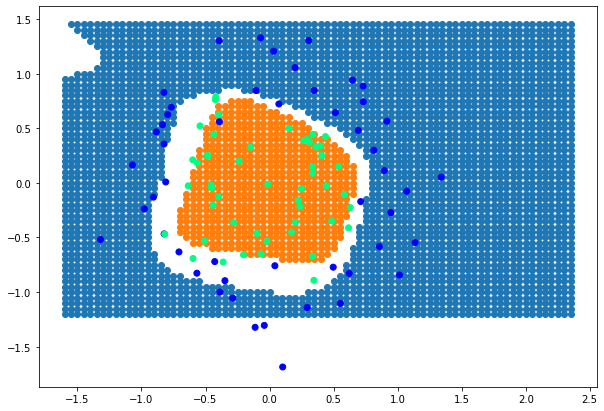

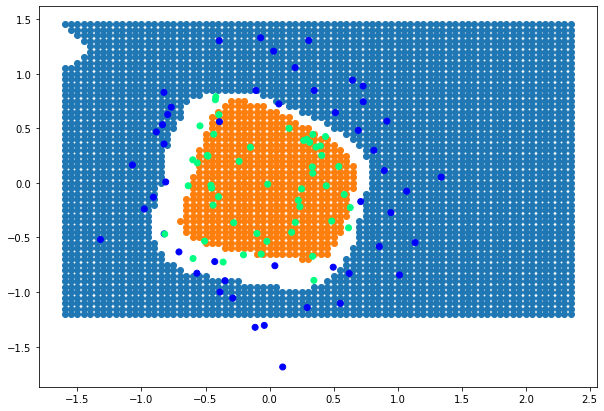

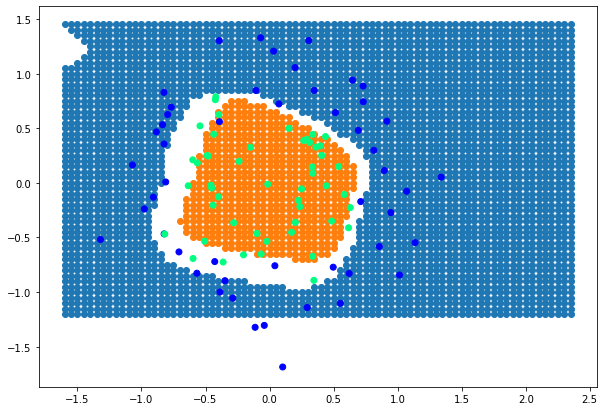

In [20]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

init = 150
#plt.figure(figsize=(10,7))
#plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)
for exe in range(20):
    # Creating a dataset with non linear aspect
    np.random.seed(0)
    #feature_set, labels = datasets.make_moons(100, noise=0.10)
    feature_set, labels = datasets.make_circles(n_samples=100, shuffle=True, noise=0.2, random_state=None, factor=0.5)
    #feature_set, labels = datasets.make_blobs(n_samples=[50,50], centers=None, n_features=2, random_state=0)

    # Creating a bias to inproove the classification
    aux = np.zeros((100, 3))
    aux[:,:-1] = feature_set
    aux[:,2] = 1

    feature_set = aux

    # These are the zeros or ones to dataset output
    labels = labels.reshape(100, 1)

    # Defining an activation function and its derivative
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    def sigmoid_der(x):
        return sigmoid(x) *(1-sigmoid (x))

    # Starting with random wheigths for the hiden layer and for the output
    wh = np.random.rand(len(feature_set[0]), 19)
    wm = np.random.rand(19, 7)
    wo = np.random.rand(7, 1)

    # The learning rate to the gradiend descend
    lr = 0.3

    # epoch loop for the learning
    init = init + 50
    for epoch in range(init):
        # Calculating the neuron values at hiden layer
        zh = np.dot(feature_set, wh)
        nh = sigmoid(zh)
        dzh = sigmoid_der(zh)
        # Calculating the neurons at second hiden layer
        zm = np.dot(nh, wm)
        nm = sigmoid(zm)
        dzm = sigmoid_der(zm)
        # Calculating the neuron values at the output
        zo = np.dot(nm, wo)
        no = sigmoid(zo)
        dzo = sigmoid_der(zo)
        # Phase1 =======================
        error_out = ((1 / 2) * (np.power((no - labels), 2)))
        #print(error_out.sum())
        error = no - labels

        dcost_au = np.dot(error * dzo, wo.T)
        dcost_av = np.dot(error * dzm, wm.T)

        dcost_wo = np.dot(nm.T, error * dzo)
        dcost_wm = np.dot(nh.T, dzm * dcost_au)
        dcost_wh = np.dot(feature_set.T, dzh * dcost_av)

        # Update Weights ================
        wo = wo - lr * dcost_wo
        wm = wm - lr * dcost_wm
        wh = wh - lr * dcost_wh

    def predmap(x,y, z):
        # Calculating the neuron values at hiden layer
        zh = np.dot(np.array([x, y, z]), wh)
        nh = sigmoid(zh)

        zm = np.dot(nh, wm)
        nm = sigmoid(zm)
        # Calculating the neuron values at the output
        zo = np.dot(nm, wo)
        no = sigmoid(zo)
        if (no <= 0.1):
            color = 'blue'
        elif (no >= 0.9):
            color = 'green'
        else:
            color = 'Eu não sei'
        return color

    blue = []
    green = []
    for i in np.arange(-1.6, 2.4, 0.05):
        for j in np.arange(-1.2, 1.5, 0.05):
            color = predmap(i,j,1)

            if color == 'green':
                green.append([i, j])
            elif color == 'blue':
                blue.append([i, j])

    blue = np.array(blue)
    green = np.array(green)

    # Creating a dataset with non linear aspect
    np.random.seed(0)
    #feature_set, labels = datasets.make_moons(100, noise=0.30)
    feature_set, labels = datasets.make_circles(n_samples=100, shuffle=True, noise=0.2, random_state=None, factor=0.5)
    #feature_set, labels = datasets.make_blobs(n_samples=[50,50], centers=None, n_features=2, random_state=0)
    plt.figure(figsize=(10,7))
    try:
        plt.scatter(list(blue[:,0]), list(blue[:,1]))
        plt.scatter(list(green[:,0]), list(green[:,1]))
    except:
        pass
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)
    plt.savefig('images/'+str(init)+'.png', dpi=50)

In [21]:
import imageio
images = []
lista = ['images/'+str(200+x*50)+'.png' for x in range(20)]
for filename in lista:
    images.append(imageio.imread(filename))
imageio.mimsave('convergence2.gif', images)